In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
df = pd.read_csv('/content/drive/MyDrive/TimeSeries/Gia SMP va SMPcap 2021(Giá thị trường SMP)1.csv',encoding="latin-1",sep = ';')
df.head()

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
df = pd.read_csv('/content/drive/MyDrive/TimeSeries/Gia SMP va SMPcap 2021(Giá thị trường SMP)1.csv',encoding="latin-1",sep = ';')
df.head()

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Change the delimiter to ';' to match the file
data2 = np.loadtxt("/content/drive/MyDrive/TimeSeries/Gia SMP va SMPcap 2021(Giá thị trường SMP)1.csv",encoding='latin-1', delimiter=';', skiprows=1, usecols=(10, 11, 12), dtype=float)
df.head()

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [6]:
feats= ['Ngay','10','11','12']
df[feats].head()


,Ngay,10,11,12
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.1,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5


In [7]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)



Start probabilities:  [0. 1.]
Transition matrix:  [[0.         1.        ]
 [0.00831025 0.99168975]]
Means:  [[1007.9        1011.96666667 1012.        ]
 [1040.5461326  1040.5461326  1040.5461326 ]]
Covariances:  [[[ 1502.05        1543.68        1542.20333333]
  [ 1543.68        1598.08555556  1596.47333333]
  [ 1542.20333333  1596.47333333  1594.86333333]]

 [[11097.07284416 11097.07284416 11097.07284416]
  [11097.07284416 11097.07284416 11097.07284416]
  [11097.07284416 11097.07284416 11097.07284416]]]


In [8]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sampled observations:  [[ 747.36468381  747.36468461  747.36468461]
 [1042.51079628 1042.51079812 1042.51079812]
 [ 882.21646946  882.21647174  882.21647174]
 [1208.85397981 1208.85398104 1208.85398104]
 [1171.53845156 1171.53844848 1171.53844

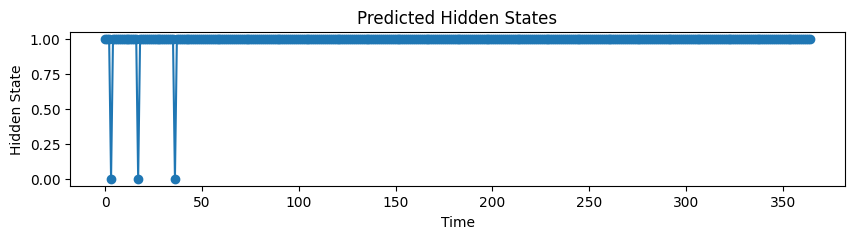

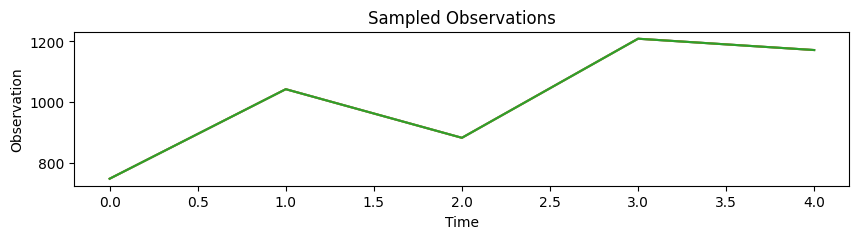

In [9]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2))
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [11]:
# Chọn cột 10,11 và 12
X = df.iloc[:, [10, 11, 12]].values

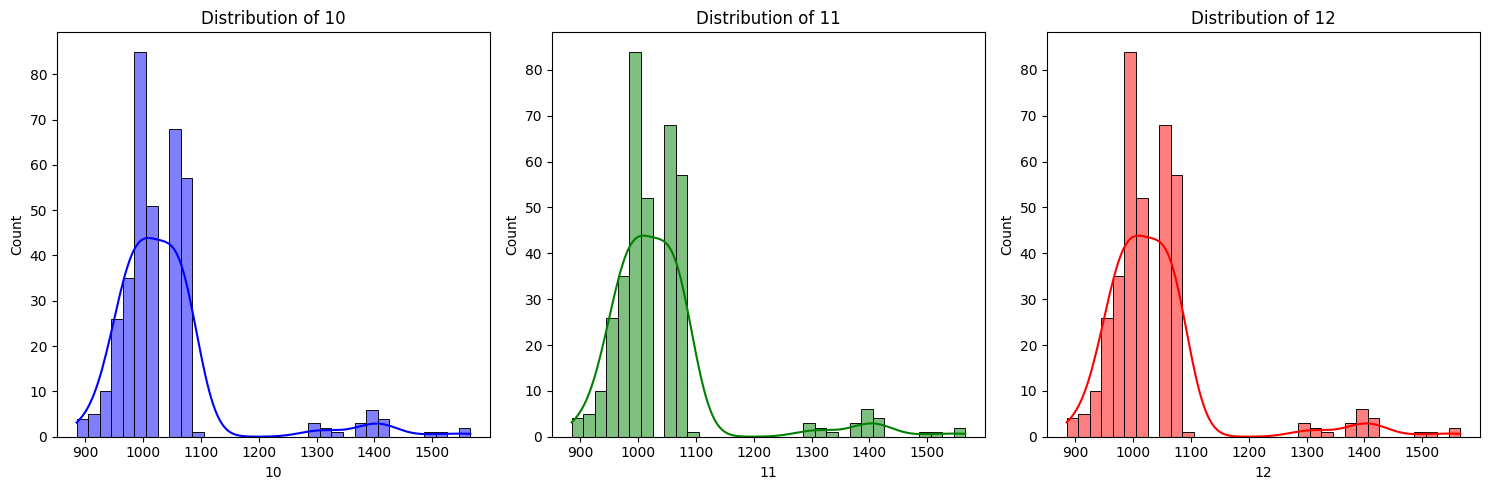

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x=df.columns[10], kde=True, color='blue')
plt.title('Distribution of ' + df.columns[10])

plt.subplot(1, 3, 2)
sns.histplot(data=df, x=df.columns[11], kde=True, color='green')
plt.title('Distribution of ' + df.columns[11])

plt.subplot(1, 3, 3)
sns.histplot(data=df, x=df.columns[12], kde=True, color='red')
plt.title('Distribution of ' + df.columns[12])

plt.tight_layout()
plt.show()

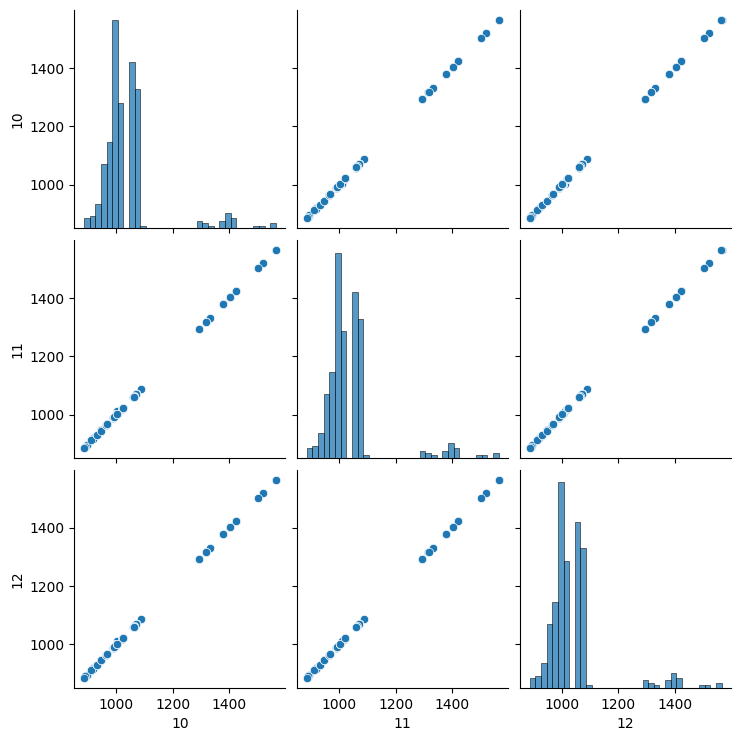

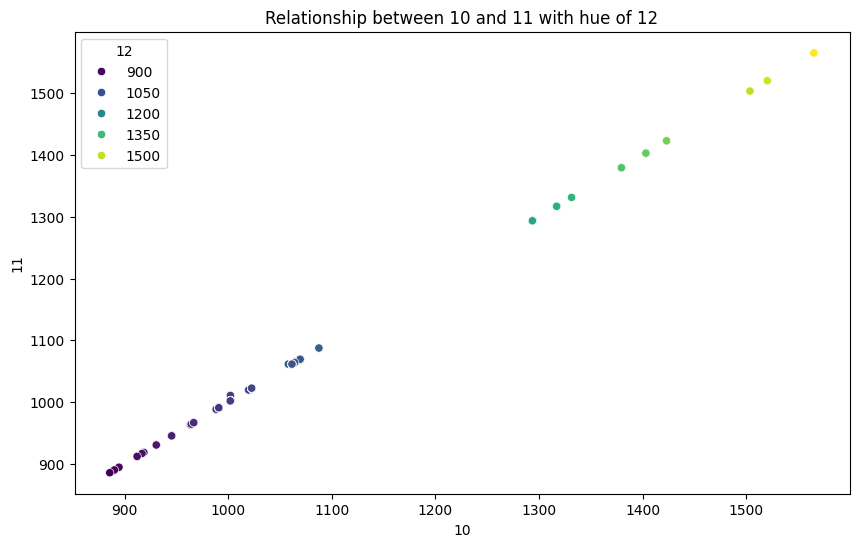

In [14]:
# Trực quan hóa mối quan hệ giữa các cột
sns.pairplot(df.iloc[:, [10,11,12]])
plt.show()

# Nếu muốn hiển thị các mối quan hệ trong cùng một biểu đồ với scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 10], y=df.iloc[:,11], hue=df.iloc[:, 12], palette='viridis')
plt.title('Relationship between ' + df.columns[10] + ' and ' + df.columns[11] + ' with hue of ' + df.columns[12])
plt.xlabel(df.columns[10])
plt.ylabel(df.columns[11])
plt.show()

In [15]:
# pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=e314f14772af90f0e75f259d7b98fb2b312ed34f3e326e6a5d98285add4d5064
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


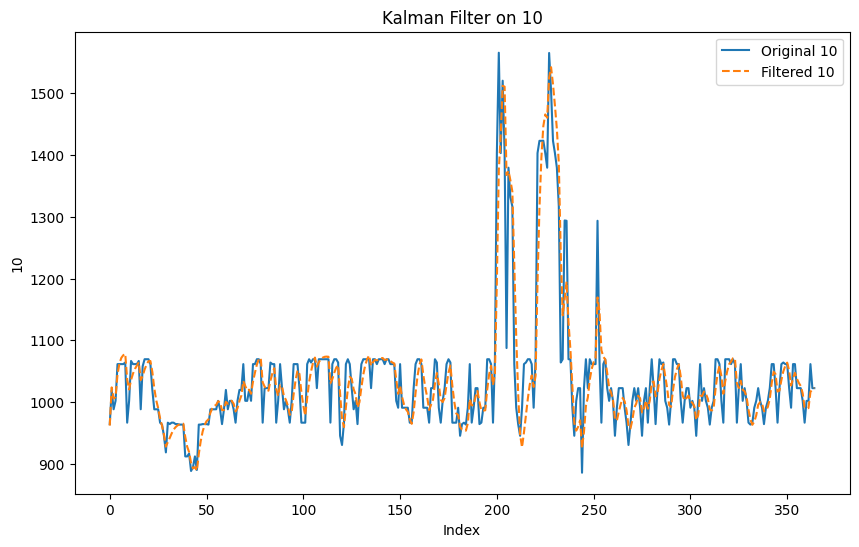

In [16]:

from filterpy.kalman import KalmanFilter

import numpy as np

# Function to apply Kalman Filter
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])       # initial state (location and velocity)
    kf.F = np.array([[1., 1.], [0., 1.]]) # state transition matrix
    kf.H = np.array([[1., 0.]])     # Measurement function
    kf.P *= 1000.                   # covariance matrix
    kf.R = 5                        # state uncertainty
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) # process uncertainty

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

# Áp dụng Kalman Filter cho cột thứ 10 (Feature_10)
filtered_feature_10 = apply_kalman_filter(X[:, 0])

# So sánh dữ liệu gốc và dữ liệu đã lọc
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], label='Original ' + df.columns[10])
plt.plot(filtered_feature_10, label='Filtered ' + df.columns[10], linestyle='dashed')
plt.title('Kalman Filter on ' + df.columns[10])
plt.xlabel('Index')
plt.ylabel(df.columns[10])
plt.legend()
plt.show()

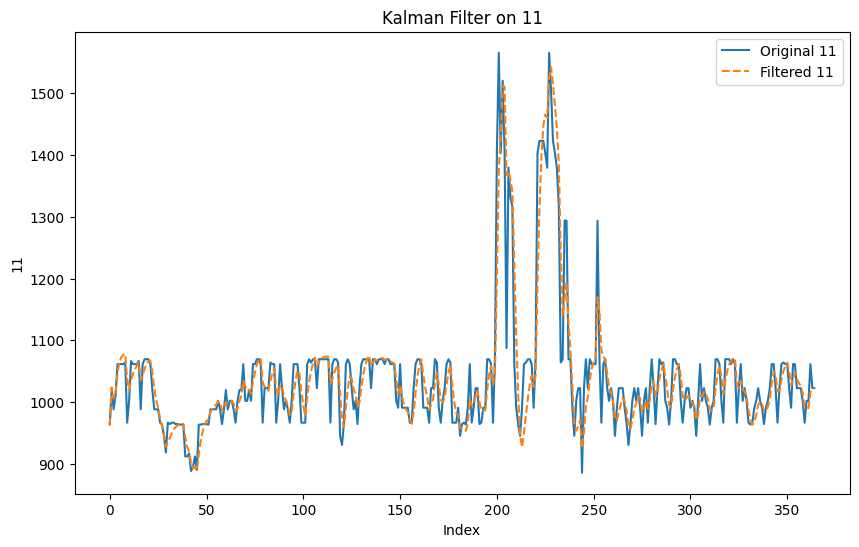

In [17]:
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])       # initial state (location and velocity)
    kf.F = np.array([[1., 1.], [0., 1.]]) # state transition matrix
    kf.H = np.array([[1., 0.]])     # Measurement function
    kf.P *= 1000.                   # covariance matrix
    kf.R = 5                        # state uncertainty
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) # process uncertainty

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

# Apply Kalman Filter to the second column 11 (Feature_11)
filtered_feature_11 = apply_kalman_filter(X[:, 2])

# Compare the original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], label='Original ' + df.columns[11])
plt.plot(filtered_feature_11, label='Filtered ' + df.columns[11], linestyle='dashed')
plt.title('Kalman Filter on ' + df.columns[11])
plt.xlabel('Index')
plt.ylabel(df.columns[11])
plt.legend()
plt.show()

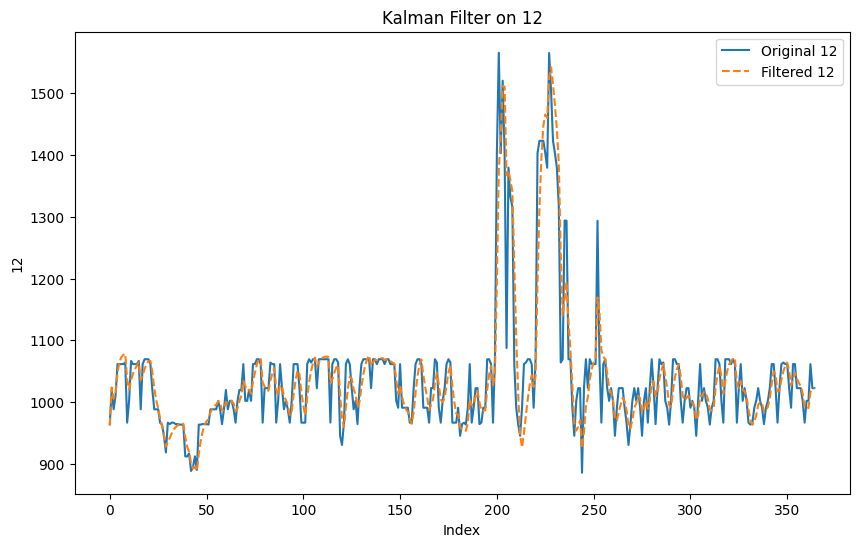

In [19]:

# Import the necessary modules
from filterpy.kalman import KalmanFilter
import numpy as np

# Function to apply Kalman Filter
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])       # initial state (location and velocity)
    kf.F = np.array([[1., 1.], [0., 1.]]) # state transition matrix
    kf.H = np.array([[1., 0.]])     # Measurement function
    kf.P *= 1000.                   # covariance matrix
    kf.R = 5                        # state uncertainty
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) # process uncertainty

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

# Apply Kalman Filter to the second column 12 (Feature_12)
filtered_feature_12 = apply_kalman_filter(X[:, 2])

# Compare the original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], label='Original ' + df.columns[12])
plt.plot(filtered_feature_12, label='Filtered ' + df.columns[12], linestyle='dashed')
plt.title('Kalman Filter on ' + df.columns[12])
plt.xlabel('Index')
plt.ylabel(df.columns[12])
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


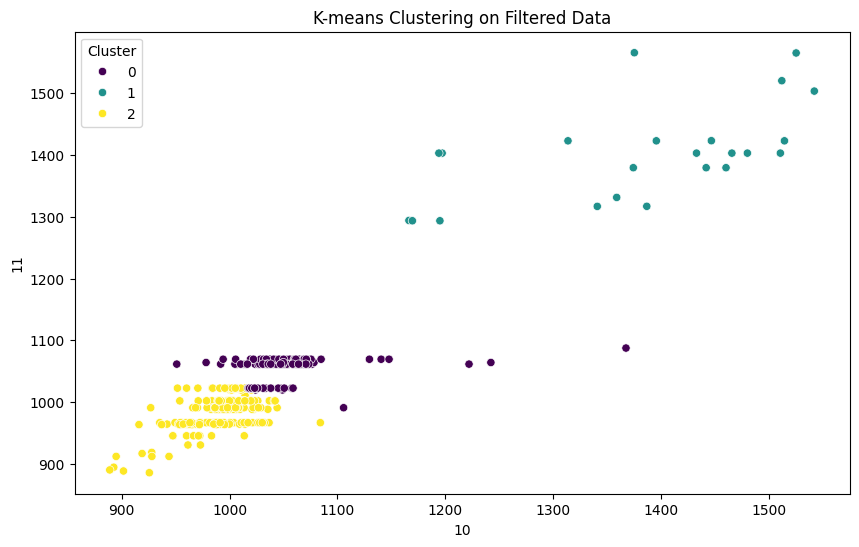

In [20]:
from sklearn.cluster import KMeans

# Tạo một DataFrame mới với cột 10, cột 11 đã được lọc, và cột 12
df_filtered = pd.DataFrame({
    df.columns[10]: X[:, 0],
    df.columns[11]: filtered_feature_11,
    df.columns[12]: X[:, 2]
})

# Sử dụng k-means clustering với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

# Trực quan hóa kết quả cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered[df.columns[11]], y=df_filtered[df.columns[12]], hue=df_filtered['Cluster'], palette='viridis')
plt.title('K-means Clustering on Filtered Data')
plt.xlabel(df.columns[10])
plt.ylabel(df.columns[11])
plt.show()